# Decision Trees

A Decision Tree is a supervised learning model created from labeled training data. The process involves:

1. Splitting Data:

- At each step, data is split based on a feature (e.g., students' average grade).

2. Creating Subsets:

- After each split, data forms smaller subsets, which are split again based on other features.

3. Leaf Nodes:

- When further splitting stops, we reach a leaf, where points are classified based on the majority label.

The key challenge is determining the best features to split on, which we'll explore next.


## Implementing a Decision Tree

To implement a decision tree, we'll use scikit-learn to fit the model and visualize it. The dataset includes features like car price, maintenance cost, number of doors, seating capacity, trunk size, and safety rating. The goal is to determine which factors influence the decision to buy a car.


  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


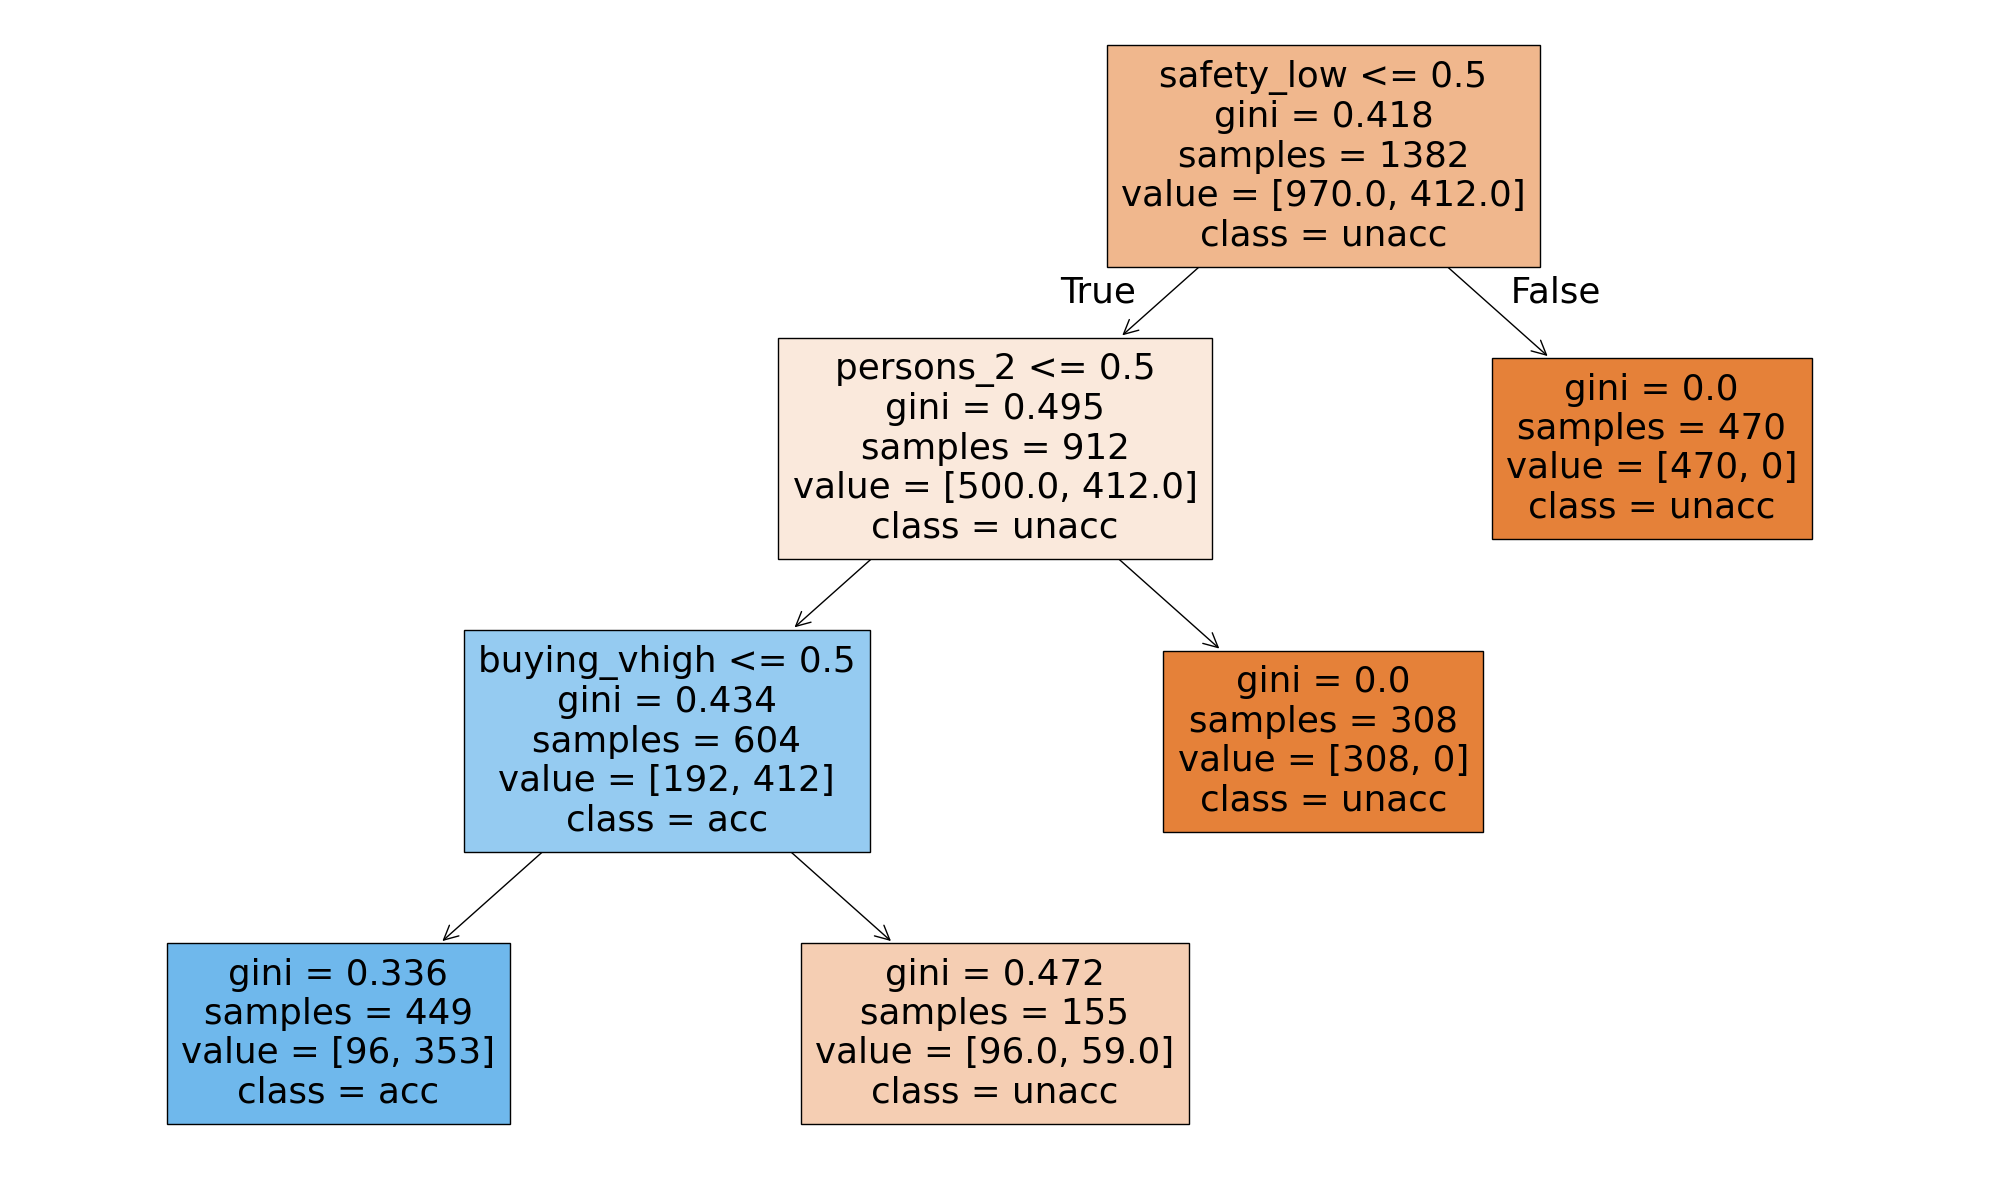

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Loading the dataset
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)

# Take a look at the dataset
print(df.head())

# Setting the target and predictor variables
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df["accep"]

# Examine the new features
print(X.columns)
print(len(X.columns))

# Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01, criterion="gini")
dt.fit(x_train, y_train)

# Plotting the Tree
plt.figure(figsize=(20, 12))
tree.plot_tree(
    dt,
    feature_names=x_train.columns,
    max_depth=5,
    class_names=["unacc", "acc"],
    label="all",
    filled=True,
)
plt.tight_layout()
plt.show()

## Interpreting a Decision Tree

The decision tree shows how splits are made based on the car dataset's features. The root node is at the top, showing the total number of samples and their class distribution. True branches go left, and False branches go right, with leaves representing majority class outcomes.


In [14]:
frac_acc = 412 / 1382
print(f"Fraction of acceptable cars: {frac_acc}")
low_safety_class = "unacc"
print(f"Cars with low safety: {low_safety_class}")
sample_class = "unacc"
print(f"The class of the sample car: {sample_class}")

Fraction of acceptable cars: 0.2981186685962373
Cars with low safety: unacc
The class of the sample car: unacc


## Gini impurity

Gini impurity measures how mixed the classes are at a given node. It is 0 when all data points at a node belong to one class (pure), and it reaches its maximum when the classes are evenly mixed.


Gini impurity for two classes:

$1 - (p_1^2 + p_2^2) = 1 - (p_1^2 + (1 - p_1)^2)$

Gini impurity for $C$ classes:

$1 - \sum_{i=1}^{C} p_i^2$

The goal is to minimize Gini impurity when building a decision tree to create pure leaf nodes.


In [15]:
gini_root = 1 - ((412 / 1382) ** 2 + (970 / 1382) ** 2)
print(f"Gini impurity root node : {gini_root}")


gini_bottom_left = 1 - ((96 / 449) ** 2 + (353 / 449) ** 2)
print(f"Gini impurity bottom left node : {gini_bottom_left}")

Gini impurity root node : 0.41848785606128835
Gini impurity bottom left node : 0.33618880858725886


## Information gain

Information gain quantifies the effectiveness of a feature in reducing uncertainty or impurity when splitting data in a decision tree. It measures the difference in Gini impurity before and after the split.

To calculate information gain:

- Start with the initial Gini impurity of the root node (e.g., 0.418).
- Perform a split based on a feature (e.g., safety_low <= 0.5).
- Calculate the Gini impurity of the resulting nodes (e.g., 0.495 and 0).
- Compute the weighted Gini impurity after the split:

  $$
  \text{Weighted Gini Impurity} = \frac{912}{1382} \times 0.495 + \frac{470}{1382} \times 0 = 0.3267
  $$

- Finally, calculate the information gain:

$$
\text{Information Gain} = \text{Initial Gini Impurity} - \text{Weighted Gini Impurity} = 0.4185 - 0.3267 = 0.0918
$$

Higher information gain indicates a better feature for splitting; if it's 0, the split is ineffective.


In [16]:
# Information gain at a pure node (i.e., node with no more branches!)
r = 0.5  # ratio of new split, could be anything
gini_pure_node = 0
gini_info_gain = r * gini_pure_node + (1 - r) * gini_pure_node
print(f"Gini information gain pure node split safety_low >= .5 : {gini_info_gain}")

# Information gain at the 'persons_2' split
r_persons_2 = 604 / 912  # read ratio of the split from the tree!
gini_left_split = 0.434
gini_right_split = 0
initial_gini_persons_2 = 0.495

weighted_gini_persons_2 = (
    r_persons_2 * gini_left_split + (1 - r_persons_2) * gini_right_split
)

gini_info_gain_persons_2 = initial_gini_persons_2 - weighted_gini_persons_2

print(f"Gini information gain node persons_2 : {gini_info_gain_persons_2}")

Gini information gain pure node split safety_low >= .5 : 0.0
Gini information gain node persons_2 : 0.20757017543859652


## Feature Splitting Process in Decision Trees

To determine the best feature to split on at each node, we calculate the Information Gain for each possible feature.

For example, the feature `safety_low` was chosen as the root node because it had the highest information gain:

$Information Gain = 0.4185 - 0.3267 = 0.0918$

We will now check if this was indeed the best split by calculating the information gain for other features, such as `persons_2`. The left split corresponds to `persons_2 < 0.5` and the right split corresponds to `persons_2 > 0.5`.

By comparing the information gain values of all possible features, the algorithm determines the optimal feature to split on at each node.


In [17]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df["accep"]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain


def gini(data):
    """calculate the Gini Impurity"""
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True) ** 2)


def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)


# Calculate sample sizes for a split on `persons_2`

left = y_train[x_train["persons_2"] == 0]
right = y_train[x_train["persons_2"] == 1]
len_left = len(left)
len_right = len(right)
print("No. of cars with persons_2 == 0:", len_left)
print("No. of cars with persons_2 == 1:", len_right)

# Calculate gini impurities
gi = gini(y_train)
gini_left = gini(left)
gini_right = gini(right)

print("Left split gini impurity:", gini_left)
print("Right split gini impurity:", gini_right)

# Information gain when using feature `persons_2`
info_gain_persons_2 = info_gain(left, right, gi)
print("Information gain for persons_2:", info_gain_persons_2)

# Which feature split maximizes information gain?
info_gain_list = []
for i in x_train.columns:
    left = y_train[x_train[i] == 0]
    right = y_train[x_train[i] == 1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1, ascending=False)
print(info_gain_table.iloc[0, :][0])
print(f"Greatest impurity gain at:{info_gain_table.iloc[0,:]}")
print(info_gain_table)

No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0
Information gain for persons_2: 0.09013468781461476
safety_low
Greatest impurity gain at:0    safety_low
1      0.091603
Name: 19, dtype: object
                 0         1
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002021
0      buying_high  0.001094
4       maint_high  0.000530
10         doors_4  0.000423
16    lug_boot_med  0.000386
11     doors_5more  0.000325
9          doors_3  0.000036


## Recursive Process in Decision Trees

The decision tree construction follows a recursive algorithm:

1. Start with the full dataset.
2. Find the best feature to split the data (maximizing information gain).
3. Split the data based on that feature.
4. Recursively apply this process to each subset created from the split.

The recursion stops when no further split can increase purity, resulting in a leaf node.


In [18]:
def gini(data):
    """calculate the Gini Impurity"""
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True) ** 2)


def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)


df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df["accep"]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

y_train_sub = y_train[x_train["safety_low"] == 0]
x_train_sub = x_train[x_train["safety_low"] == 0]

gi = gini(y_train_sub)
print(f"Gini impurity at root: {gi}")

info_gain_list = []
for i in x_train.columns:
    left = y_train_sub[x_train_sub[i] == 0]
    right = y_train_sub[x_train_sub[i] == 1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1, ascending=False)
print(f"Greatest impurity gain at:{info_gain_table.iloc[0,:]}")

Gini impurity at root: 0.49534472145275465
Greatest impurity gain at:0    persons_2
1     0.208137
Name: 12, dtype: object


## Training and Predicting with Decision Tree in scikit-learn

1. Instantiate the Model: Create the model with `DecisionTreeClassifier()`. Hyperparameters can be set like max_depth=5.
2. Fit the Model: Use `.fit(X, y)` to train the model using the dataset `X` and labels `y`.
3. Predict: Use `.predict()` to classify new data points or `.predict_proba()` to get class probabilities.
4. Evaluate: Use `.score()` to calculate the accuracy of the model on test data.

Note: Ensure all data is numeric and handle categorical variables and nulls before fitting.


In [19]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df["accep"]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f"Decision Tree parameters: {dtree.get_params()}")

# Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train, y_train)
print(f"Decision tree depth: {dtree.get_depth()}")

# Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)

print(
    f"Test set accuracy: {dtree.score(x_test, y_test)}"
)  # or accuracy_score(y_test, y_pred)


Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9855491329479769


## Visualizing Decision Trees

Once you've built and trained a decision tree, you can visualize it using scikit-learn's built-in functions:

1. Plot Tree: Use `plot_tree()` from `sklearn.tree` to visualize the tree structure.
2. Text Representation: Use `export_text()` to print the rules of the tree as text.

These methods provide insights into the features used for splits and the overall structure of the decision tree.

For more advanced visualizations, consider libraries like `graphviz` or `dtreeviz`, but these require additional installations.


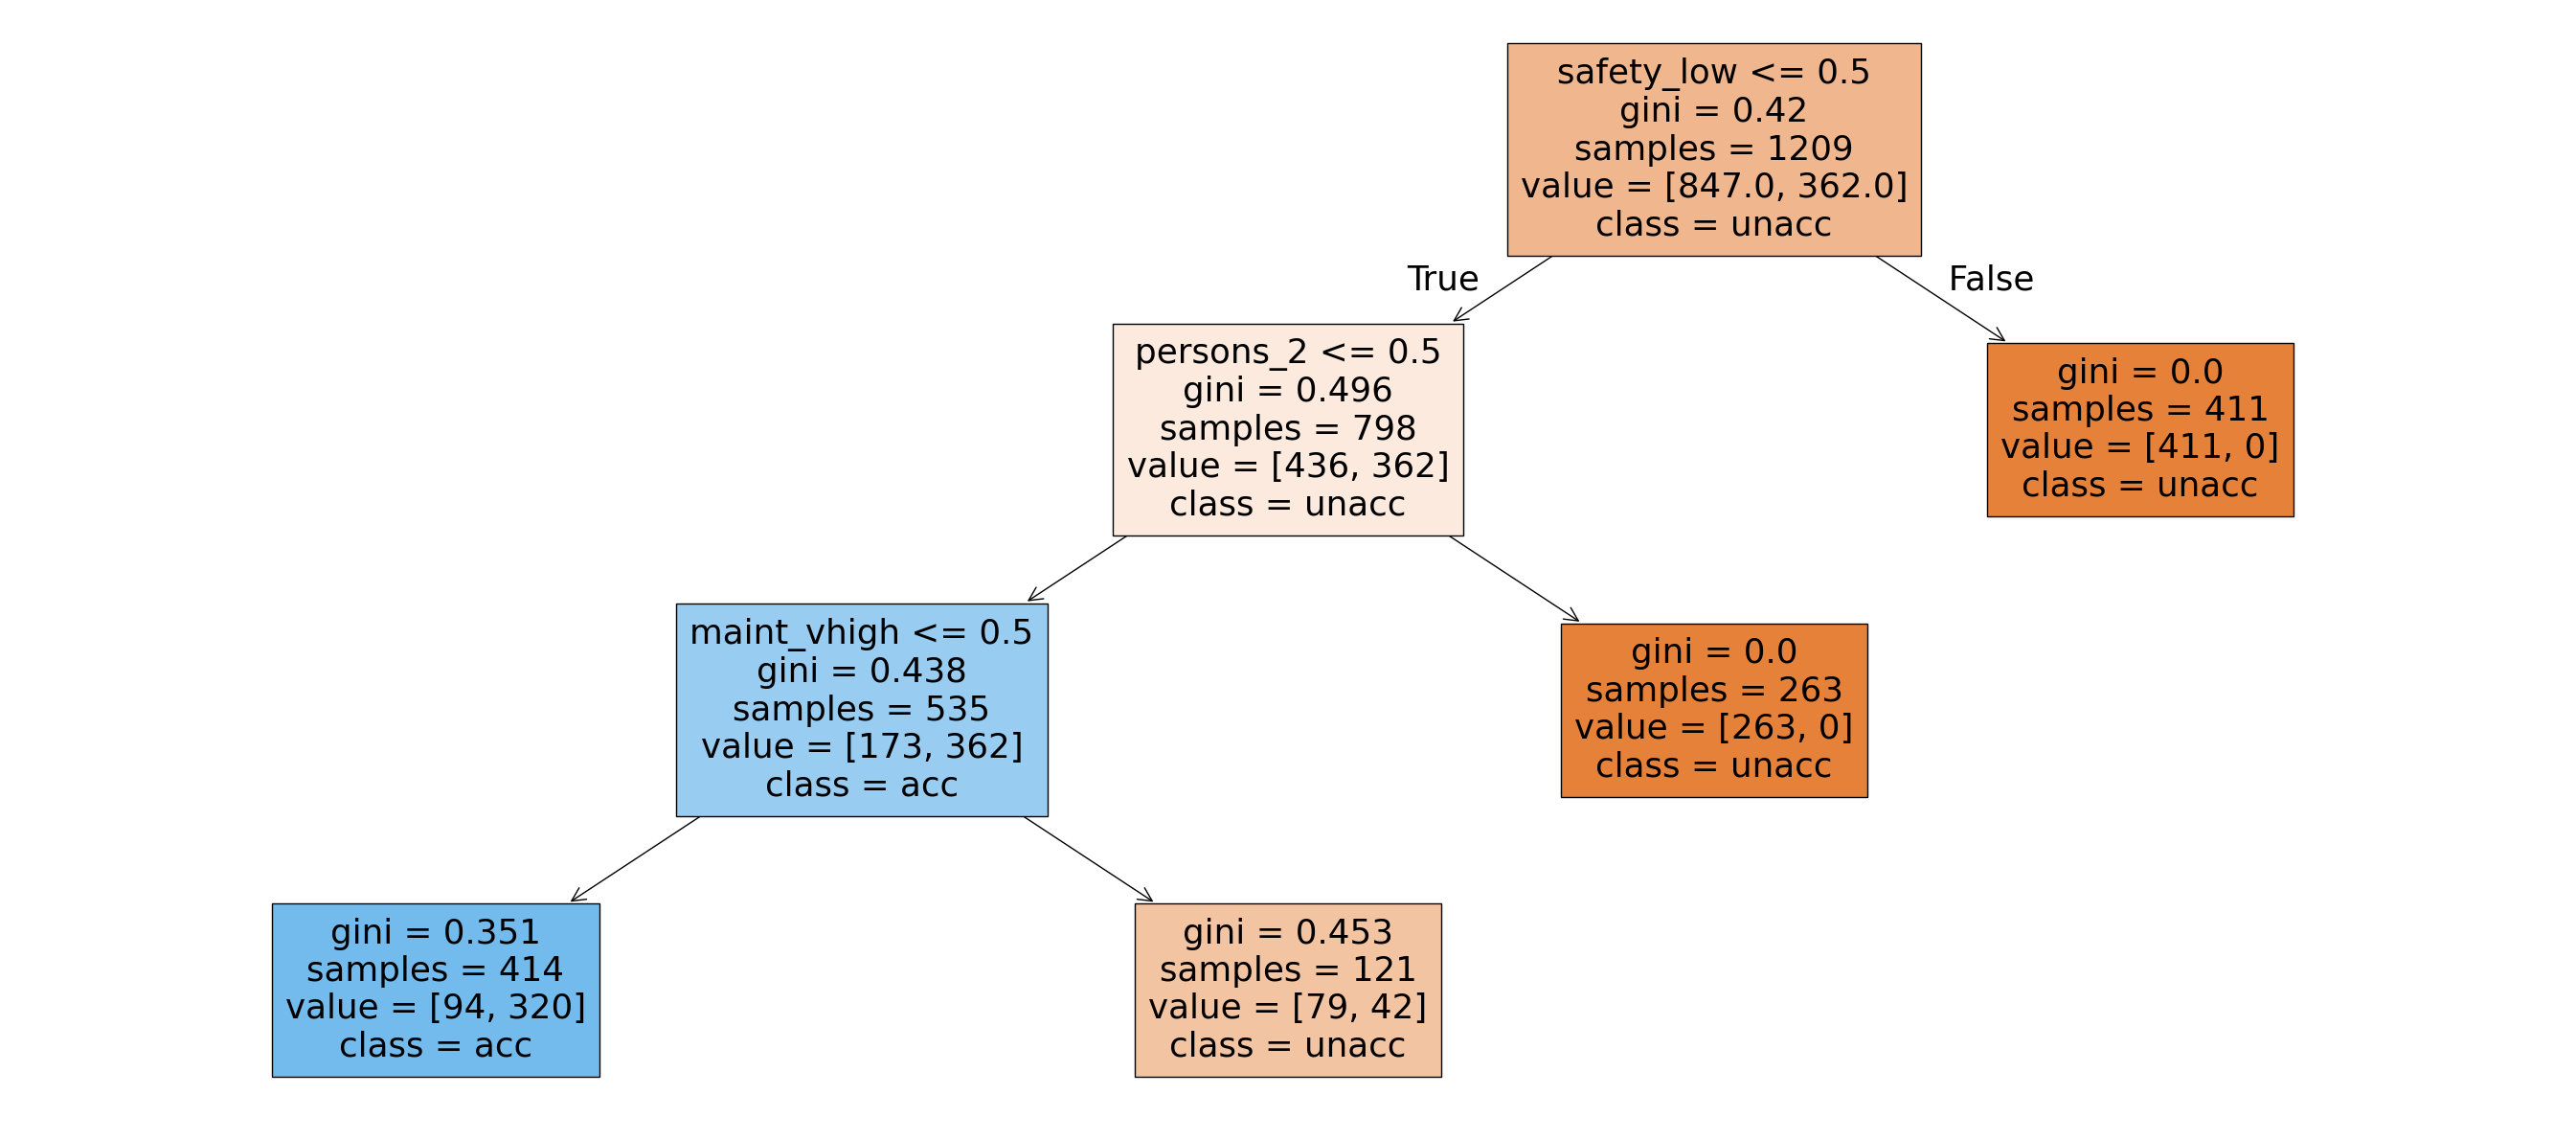

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- maint_vhigh <= 0.50
|   |   |   |--- class: True
|   |   |--- maint_vhigh >  0.50
|   |   |   |--- class: False
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False



In [20]:
## Loading the data and setting target and predictor variables
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6])
y = df["accep"]

## Train-test split and fitting the tree
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

## Visualizing the tree
plt.figure(figsize=(27, 12))
tree.plot_tree(
    dtree, feature_names=x_train.columns, class_names=["unacc", "acc"], filled=True
)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree, feature_names=x_train.columns.tolist()))

### Advantages of Decision Trees

- Easy to Understand: Decision trees are intuitive and simple to interpret, even for non-technical people.
- Visualization: The decision-making process can be visualized, which makes it easier to explain the model's behavior.
- Minimal Data Preprocessing: Little to no scaling, normalization, or outlier removal is required.
- Quick Training and Prediction: Decision trees train and predict relatively fast compared to other machine learning algorithms.
- Handles Categorical and Numerical Data: Can work with both types of data easily.

### Disadvantages of Decision Trees:

- Not Globally Optimal: The greedy algorithm used to construct the tree only looks for the best split at each step, not considering how future splits may affect the overall structure. Finding the globally optimal tree is very difficult.
- Prone to Overfitting: Larger trees tend to overfit the training data, capturing noise and reducing the model's ability to generalize to unseen data.
- Sensitive to Data: Small changes in the data can result in entirely different trees being generated. This instability can reduce the model's robustness.

To mitigate overfitting, techniques like pruning or using ensemble methods such as Random Forest or Gradient Boosting can be employed.


In [21]:
## Two decision trees
dtree1 = DecisionTreeClassifier()
dtree2 = DecisionTreeClassifier(max_depth=7)

## Fit first decision tree
dtree1.fit(x_train, y_train)
dtree1_depth = dtree1.get_depth()
print(f"First Decision Tree depth: {dtree1_depth}")

## Fit second decision tree
dtree2.fit(x_train, y_train)
dtree2_depth = dtree2.get_depth()
print(f"Second Decision Tree depth: {dtree2_depth}")

## 2. Calculate accuracy scores on test data for both trees

dtree1_score = dtree1.score(x_test, y_test)
print(
    f"Test set accuracy tree no max depth: {dtree1_score}"
)  # or accuracy_score(y_test, y_pred)

dtree2_score = dtree2.score(x_test, y_test)
print(
    f"Test set accuracy tree max depth 7: {dtree2_score}"
)  # or accuracy_score(y_test, y_pred)

# Remember, a larger depth does not always mean better accuracy, as it can lead to overfitting.

First Decision Tree depth: 11
Second Decision Tree depth: 7
Test set accuracy tree no max depth: 0.9826589595375722
Test set accuracy tree max depth 7: 0.9691714836223507
